# Pandas - data alignment

## outlines

* add
* rank & sort
* summary statistics

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

In [2]:
# series
ser1 = Series(np.arange(5),index = [i for i in 'abcde'])
ser2 = Series(np.random.randn(3), index = [i for i in 'abc'])
ser1+ser2

a    0.237488
b    1.147393
c    2.159346
d         NaN
e         NaN
dtype: float64

In [4]:
# dataframe
dframe1 = DataFrame(np.arange(4).reshape(2,-1),index = ['NYC','LA'],columns = list('AB'))
dframe2 = DataFrame(np.arange(9).reshape(3,-1),index = ['NYC','SF','LA'],columns = list('ADC'))
dframe1 + dframe2

,A,B,C,D
LA,8.0,NaN,NaN,NaN
NYC,0.0,NaN,NaN,NaN
SF,NaN,NaN,NaN,NaN


## add

In [5]:
# add
dframe1.add(dframe2,fill_value=0)

,A,B,C,D
LA,8.0,3.0,8.0,7.0
NYC,0.0,1.0,2.0,1.0
SF,3.0,NaN,5.0,4.0


In [6]:
# Create a Series from DataFrame's row 
dframe = DataFrame(np.random.randn(9).reshape(3,-1),index = ['NYC','SF','LA'],columns = list('ABC'))
ser1 = dframe.iloc[1]
print(dframe)
print(ser1)

# Now we can use arithmetic operations
dframe - ser1

            A         B         C
NYC -0.315163  1.063456 -0.191926
SF  -1.262319  0.871088  0.124688
LA  -0.089398  1.323457 -0.893591
A   -1.262319
B    0.871088
C    0.124688
Name: SF, dtype: float64


,A,B,C
NYC,0.947156,0.192368,-0.316613
SF,0.000000,0.000000,0.000000
LA,1.172921,0.452369,-1.018279


## rank & sort

resource : https://github.com/jmportilla/Udemy-notes/blob/master/Lec%2021%20-%20Rank%20and%20Sort.ipynb

In [8]:
ser1 = Series(np.arange(5),index = [i for i in 'atcje'])
print(ser1)
print(ser1.sort_index()) # sort by index 

# https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.Series.order.html
print(ser1.sort_values())# sort by values

a    0
t    1
c    2
j    3
e    4
dtype: int32
a    0
c    2
e    4
j    3
t    1
dtype: int32
a    0
t    1
c    2
j    3
e    4
dtype: int32


In [9]:
from numpy import random
ser = Series(random.randn(10))
print(ser)
print(ser.rank())
print(ser.sort_values())

0    0.377689
1    0.094262
2    0.322261
3   -0.346589
4   -0.425065
5    1.296336
6   -0.862388
7   -0.626432
8   -0.136107
9   -1.090325
dtype: float64
0     9.0
1     7.0
2     8.0
3     5.0
4     4.0
5    10.0
6     2.0
7     3.0
8     6.0
9     1.0
dtype: float64
9   -1.090325
6   -0.862388
7   -0.626432
4   -0.425065
3   -0.346589
8   -0.136107
1    0.094262
2    0.322261
0    0.377689
5    1.296336
dtype: float64


## summary statistics

resource : https://github.com/jmportilla/Udemy-notes/blob/master/Lec%2022%20-%20Summary%20Statistics.ipynb

In [17]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
from sklearn.preprocessing import Imputer

In [18]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])
dframe1 = DataFrame(arr,index=['A','B'],columns = ['One','Two','Three'])

#Show
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [20]:
# deal with the missing data
# old version
X = dframe1.values
imputer = Imputer(missing_values='NaN',strategy='mean',axis=1)
X = imputer.fit_transform(X)
print(X)

X1 = dframe1.values
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
X1 = imputer.fit_transform(X1)
X1

[[1.  2.  1.5]
 [3.5 3.  4. ]]


C:\Users\traffic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\traffic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[1., 2., 4.],
       [1., 3., 4.]])

### SimpleImputer
resource : https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = dframe1.values
X = imputer.fit_transform(X)
print(X)

[[1. 2. 4.]
 [1. 3. 4.]]


In [31]:
# Let's see the sum() method in action
print(dframe1.sum(axis = 0))
print(dframe1.sum(axis = 1))

# Can also grab min and max values of dataframe
print(dframe1.min())
print(dframe1.idxmin())

One      1.0
Two      5.0
Three    4.0
dtype: float64
A    3.0
B    7.0
dtype: float64
One      1.0
Two      2.0
Three    4.0
dtype: float64
One      A
Two      A
Three    B
dtype: object


In [32]:
# accumulation sum
dframe1 = DataFrame(np.arange(16).reshape(4,-1),index = list('abcd'),columns=list(range(4)))
print(dframe1)
dframe1.cumsum()

    0   1   2   3
a   0   1   2   3
b   4   5   6   7
c   8   9  10  11
d  12  13  14  15


,0,1,2,3
a,0,1,2,3
b,4,6,8,10
c,12,15,18,21
d,24,28,32,36


In [33]:
# summary statistics
dframe1.describe()

,0,1,2,3
count,4.000000,4.000000,4.000000,4.000000
mean,6.000000,7.000000,8.000000,9.000000
std,5.163978,5.163978,5.163978,5.163978
min,0.000000,1.000000,2.000000,3.000000
25%,3.000000,4.000000,5.000000,6.000000
50%,6.000000,7.000000,8.000000,9.000000
75%,9.000000,10.000000,11.000000,12.000000
max,12.000000,13.000000,14.000000,15.000000


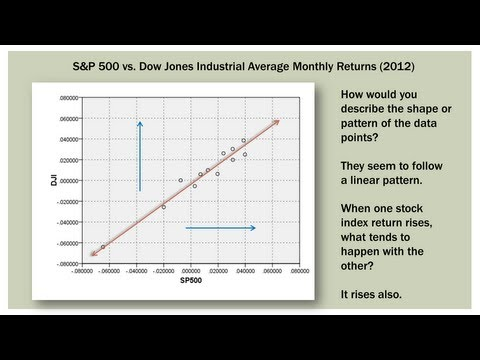

In [34]:
from IPython.display import YouTubeVideo
YouTubeVideo('xGbpuFNR1ME')

In [35]:
# https://zhuanlan.zhihu.com/p/54453306

import pandas_datareader as pdr
import datetime as dt

start = dt.datetime(2015, 1, 1)
end = dt.datetime(2018, 1, 1)

prices  = pdr.get_data_yahoo(['CVX','XOM','BP'],start = start,end = end)['Adj Close']
prices.head() 

C:\Users\traffic\Anaconda3\lib\site-packages\pandas_datareader-0.7.0-py3.7.egg\pandas_datareader\base.py:230: SymbolWarning: Failed to read symbol: 'CVX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\traffic\Anaconda3\lib\site-packages\pandas_datareader-0.7.0-py3.7.egg\pandas_datareader\base.py:230: SymbolWarning: Failed to read symbol: 'XOM', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\traffic\Anaconda3\lib\site-packages\pandas_datareader-0.7.0-py3.7.egg\pandas_datareader\base.py:230: SymbolWarning: Failed to read symbol: 'BP', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


RemoteDataError: No data fetched using 'YahooDailyReader'